Mean Squared Error (MSE): 30.51
R-squared (R2): 0.21


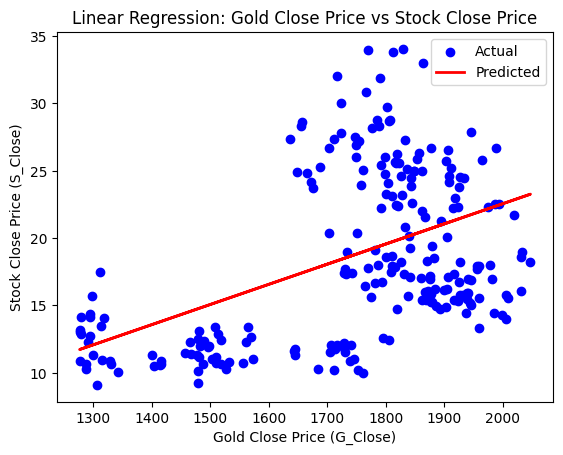

Multiple Regression (Corrected Features) - Mean Squared Error (MSE): 30.25
Multiple Regression (Corrected Features) - R-squared (R2): 0.21


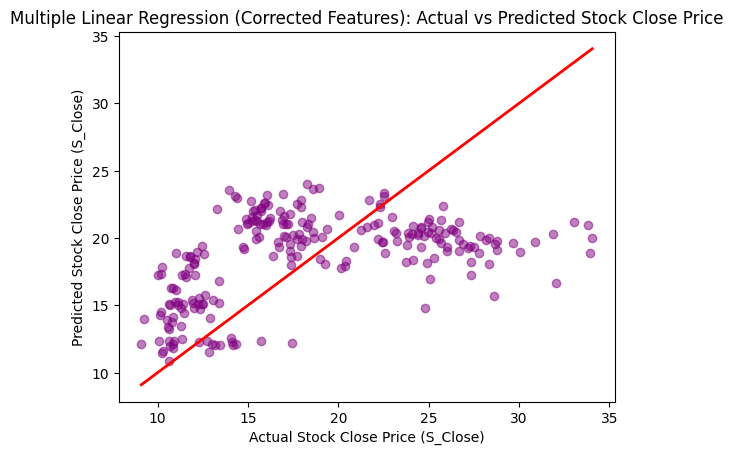

Random Forest Regression - Mean Squared Error (MSE): 26.30
Random Forest Regression - R-squared (R2): 0.32


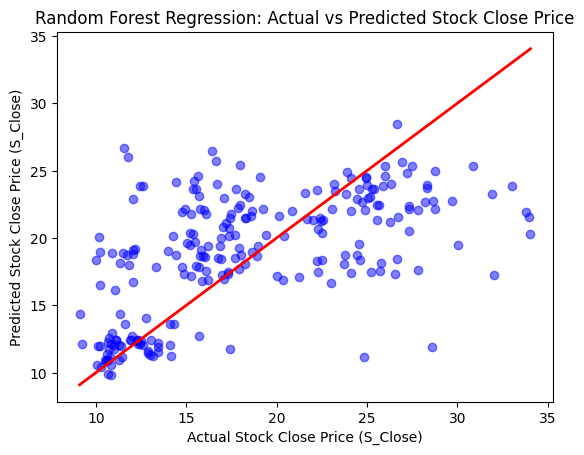

'\nAfter using a random forest regression model, the mean squared error (MSE) dropped to 26.30, and the R-squared (R²) increased to 0.32. This indicates that the random forest model better captures the relationship between gold prices and stock closing prices compared to the linear regression model, although its explanatory power is still limited, but it has improved.\n'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the uploaded Excel files
file_path_1 = r'C:\Users\Liu Yuewei\PycharmProjects\pythonProject\final\TRD_Dalyr.xlsx'
file_path_2 = r'C:\Users\Liu Yuewei\PycharmProjects\pythonProject\final\Gold Futures Historical Data.xlsx'


# Load the data into pandas dataframes
df_trd = pd.read_excel(file_path_1, sheet_name=0)
df_gold = pd.read_excel(file_path_2, sheet_name=0)

# Display the first few rows of each dataframe to understand the structure
df_trd.head(), df_gold.head()

# Preprocessing the data for regression analysis
# Converting Date columns to datetime type for easier merging
df_trd['Date'] = pd.to_datetime(df_trd['Date'])
df_gold['Date'] = pd.to_datetime(df_gold['Date'], format='%m/%d/%Y')

# Merging the two datasets on the 'Date' column
df_merged = pd.merge(df_trd, df_gold, on='Date', suffixes=('_trd', '_gold'))

# Choosing relevant columns for regression
# We will try to predict 'S_Close' (stock close price) using 'G_Close' (gold close price)
df_merged = df_merged[['Date', 'S_Close', 'G_Close']].dropna()

# Defining the predictor (X) and response (y) variables
X = df_merged[['G_Close']]
y = df_merged['S_Close']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Outputting the regression results and performance metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Plotting the regression line with the test data
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Gold Close Price (G_Close)')
plt.ylabel('Stock Close Price (S_Close)')
plt.title('Linear Regression: Gold Close Price vs Stock Close Price')
plt.legend()
plt.show()

"""
In this regression analysis, we attempted to use the gold closing price (G_Close) to predict the stock closing price (S_Close). The results showed a mean squared error (MSE) of 30.51 and an R-squared (R²) of 0.21.

This means that the gold closing price has some explanatory power for the stock closing price, but it is not very strong, with only about 21% of the variability being explained by the gold closing price. It can be seen that this regression relationship is relatively weak, indicating that the linear relationship between gold and stock prices is not very significant, or there are other influencing factors that have not been considered.
"""

# Correcting the column names based on the merged dataframe's actual columns
# Merging the datasets again, including more features from both original dataframes
df_merged_full = pd.merge(df_trd, df_gold, on='Date', suffixes=('_trd', '_gold'))

# Selecting relevant columns for regression
X_multi_corrected = df_merged_full[['G_Close', 'G_Open_gold', 'G_High_gold', 'G_Low_gold', 'G_Change_gold']]
y_multi_corrected = df_merged_full['S_Close']

# Splitting the data into training and testing sets for the multiple regression model
X_train_multi_corrected, X_test_multi_corrected, y_train_multi_corrected, y_test_multi_corrected = train_test_split(X_multi_corrected, y_multi_corrected, test_size=0.2, random_state=42)

# Creating and training the multiple linear regression model
model_multi_corrected = LinearRegression()
model_multi_corrected.fit(X_train_multi_corrected, y_train_multi_corrected)

# Making predictions on the test set
y_pred_multi_corrected = model_multi_corrected.predict(X_test_multi_corrected)

# Calculating the performance metrics
mse_multi_corrected = mean_squared_error(y_test_multi_corrected, y_pred_multi_corrected)
r2_multi_corrected = r2_score(y_test_multi_corrected, y_pred_multi_corrected)

# Outputting the regression results and performance metrics for multiple regression
print(f'Multiple Regression (Corrected Features) - Mean Squared Error (MSE): {mse_multi_corrected:.2f}')
print(f'Multiple Regression (Corrected Features) - R-squared (R2): {r2_multi_corrected:.2f}')

# Plotting the actual vs predicted values for the test set
plt.scatter(y_test_multi_corrected, y_pred_multi_corrected, color='purple', alpha=0.5)
plt.plot([y_test_multi_corrected.min(), y_test_multi_corrected.max()], [y_test_multi_corrected.min(), y_test_multi_corrected.max()], color='red', linewidth=2)
plt.xlabel('Actual Stock Close Price (S_Close)')
plt.ylabel('Predicted Stock Close Price (S_Close)')
plt.title('Multiple Linear Regression (Corrected Features): Actual vs Predicted Stock Close Price')
plt.show()

"""
After using more features (such as gold opening price, high, low, and change) for multiple regression analysis, the mean squared error (MSE) was 30.25 and the R-squared (R²) remained 0.21. This indicates that even with the addition of more features, the model's performance did not improve significantly, and these gold price features have limited explanatory power for predicting stock closing prices.
"""

from sklearn.ensemble import RandomForestRegressor

# Creating and training the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_multi_corrected, y_train_multi_corrected)

# Making predictions on the test set using the Random Forest model
y_pred_rf = rf_model.predict(X_test_multi_corrected)

# Calculating the performance metrics for the Random Forest model
mse_rf = mean_squared_error(y_test_multi_corrected, y_pred_rf)
r2_rf = r2_score(y_test_multi_corrected, y_pred_rf)

# Outputting the regression results and performance metrics for the Random Forest model
print(f'Random Forest Regression - Mean Squared Error (MSE): {mse_rf:.2f}')
print(f'Random Forest Regression - R-squared (R2): {r2_rf:.2f}')

# Plotting the actual vs predicted values for the test set using Random Forest model
plt.scatter(y_test_multi_corrected, y_pred_rf, color='blue', alpha=0.5)
plt.plot([y_test_multi_corrected.min(), y_test_multi_corrected.max()], [y_test_multi_corrected.min(), y_test_multi_corrected.max()], color='red', linewidth=2)
plt.xlabel('Actual Stock Close Price (S_Close)')
plt.ylabel('Predicted Stock Close Price (S_Close)')
plt.title('Random Forest Regression: Actual vs Predicted Stock Close Price')
plt.show()

"""
After using a random forest regression model, the mean squared error (MSE) dropped to 26.30, and the R-squared (R²) increased to 0.32. This indicates that the random forest model better captures the relationship between gold prices and stock closing prices compared to the linear regression model, although its explanatory power is still limited, but it has improved.
"""